This notebook demonstrates the implementation and application of a multivariate linear regression model for the "housing" dataset. You can download the dataset from http://lib.stat.cmu.edu/datasets/.

**Comments:** "*The file cadata.txt contains all the the variables. Specifically, it contains median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude in that order. The dependent variable is ln(median house value).*"

In [2]:
import numpy

# load data from text file (note that the initial comments have been deleted from the original file)
data = numpy.loadtxt("cadata.txt")

# the first column corresponds to the target variables; the remaining ones are the features
y, X = data[:,0], data[:,1:]

Next, we define a class for our linear regression model that implements the "fitting" phase (computation of the weights) and the "prediction" phase (computation of predictions for new data points).

In [3]:
class LinearRegression():
    """
    Linear regression implementation.
    """

    def __init__(self, algorithm="solve", lr=0.01, maxiter=1000, verbose=0):
        """
        Instantiates the model object.

        Parameters
        ----------
        algorithm : str, default="solve"
            The type of algorithm that shall be applied.
        lr : float, default 0.02
            The learning rate for gradient descent.
        maxiter : int, default 100
            The maximal number of iterations for gradient descent
        verbose : int, default 0
            Determines the amount of output messages 
            that shall be generated (0=no output)
        """           
        
        self.algorithm = algorithm
        self.lr = lr
        self.maxiter = maxiter
        self.verbose = verbose

    def _grad(self, X, y, w):
        
        grad = 2.0 / len(y) * numpy.dot(numpy.dot(X.T, X), w)
        grad = grad - 2.0 / len(y) * numpy.dot(X.T,y)
        
        return grad
        
    def fit(self, X, y):
        """
        Fits the linear regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        y : Array of shape [n_samples, 1]
        """        

        # make sure that we have multidimensional numpy arrays
        X = numpy.array(X).reshape((X.shape[0], -1))
        # IMPORTANT: Make sure that we have a column vector! 
        y = numpy.array(y).reshape((len(y), 1))

        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)           

        # compute weights
        if self.algorithm == "solve":
            
            XtX_pinv = numpy.linalg.pinv(numpy.dot(X.T, X))
            Xty = numpy.dot(X.T,y)
            self._w = numpy.dot(XtX_pinv, Xty)
            
        elif self.algorithm == "gradient":
            
            self._w = numpy.zeros((X.shape[1], 1))
            
            for i in range(self.maxiter):
                
                grad = self._grad(X, y, self._w)
                self._w = self._w - self.lr * grad
                
                if i % 25 == 0:
                    print(self._w)
                
                if self.verbose > 0:
                    loss = 1.0 / len(y) * ((self.predict(X, add_ones=False) - y)**2).sum()
                    loss = numpy.sqrt(loss)
                    print("Training loss for iteration {}: {}".format(i, loss))
                
        else:
            
            raise Exception("Algorithm {} not implemented!".format(self.algorithm))
                
    def predict(self, X, add_ones=True):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of shape [n_samples, 1]
        """                     

        # make sure that we have multidimensional numpy arrays
        X = numpy.array(X).reshape((X.shape[0], -1))

        if add_ones == True:
            # prepend a column of ones
            ones = numpy.ones((X.shape[0], 1))
            X = numpy.concatenate((ones, X), axis=1)           

        # compute predictions
        predictions = numpy.dot(X, self._w)

        return predictions

Let us normalize the data first. This makes it easier for gradient descent to find the optimal solution.

In [4]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

We first instantiate the "model" object. Afterwards, we call the "fit" method to fit our model (i.e., to compute the weights).

In [5]:
model = LinearRegression(algorithm="gradient", lr=0.1, maxiter=1000, verbose=1)
model.fit(X, y)

[[41371.16338178]
 [11697.82159846]
 [23022.66633132]
 [ 2943.08188438]
 [ 3523.26909635]
 [ 1631.36016307]
 [ 3487.27563387]
 [12838.22922819]
 [19486.1559607 ]]
Training loss for iteration 0: 177684.0794073749
Training loss for iteration 1: 144677.6989629949
Training loss for iteration 2: 127679.36358003704
Training loss for iteration 3: 119468.35436421818
Training loss for iteration 4: 115621.96508502918
Training loss for iteration 5: 113802.9098545447
Training loss for iteration 6: 112892.00400860618
Training loss for iteration 7: 112381.11314848288
Training loss for iteration 8: 112045.36822929574
Training loss for iteration 9: 111786.40729170405
Training loss for iteration 10: 111561.42386219738
Training loss for iteration 11: 111351.8278770714
Training loss for iteration 12: 111149.55083523037
Training loss for iteration 13: 110951.08921284041
Training loss for iteration 14: 110754.91891573758
Training loss for iteration 15: 110560.3739792676
Training loss for iteration 16: 1103

Given the fitted model, we can now obtain predictions for new data points. For simplification, we just use our data points again here.

In [6]:
preds = model.predict(X)

Finally, we have a look at the quality of our model by computing the RMSE and by generating a plot "predictions" vs. "true labels".

RMSE: 75163.74850270496


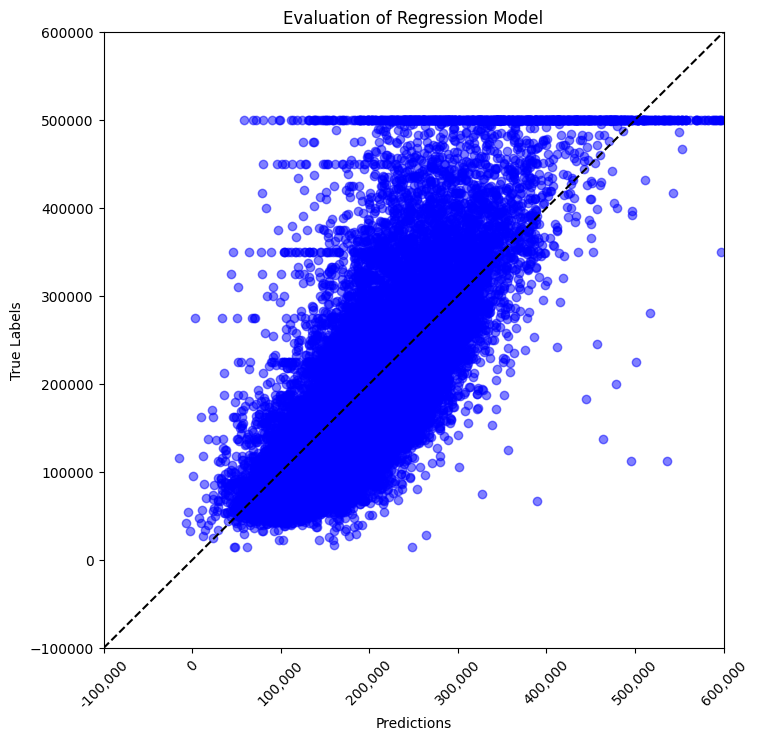

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.metrics import mean_squared_error

# compute RMSE
print("RMSE: {}".format(numpy.sqrt(mean_squared_error(y, preds))))

# visualize predictions vs. true labels
fig = plt.figure(figsize=(8,8))
plt.scatter(preds, y, color="blue", alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-100000,600000], [-100000, 600000], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-100000,600000])
plt.ylim([-100000,600000])
plt.title("Evaluation of Regression Model")
plt.show()